In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
from statannotations.Annotator import Annotator #https://github.com/trevismd/statannotations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# if getting OptionError: "No such keys(s): 'mode.use_inf_as_null'"
# !pip install --upgrade seaborn pandas

import matplotlib as mpl
import os
from glob import glob

from _load_data import * # Getting our specific labels, formatting, and data
from _cd_diagram import *

# Getting some free samples
results_df.sample(3)

print(gens)

# Don't change any code below, it may break (probably will) --------------------

range(10, 250, 25)


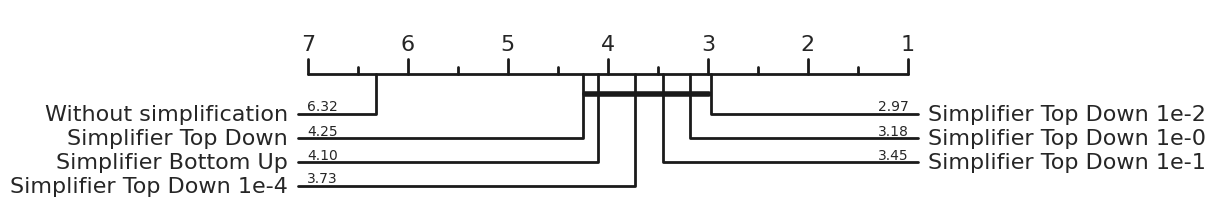

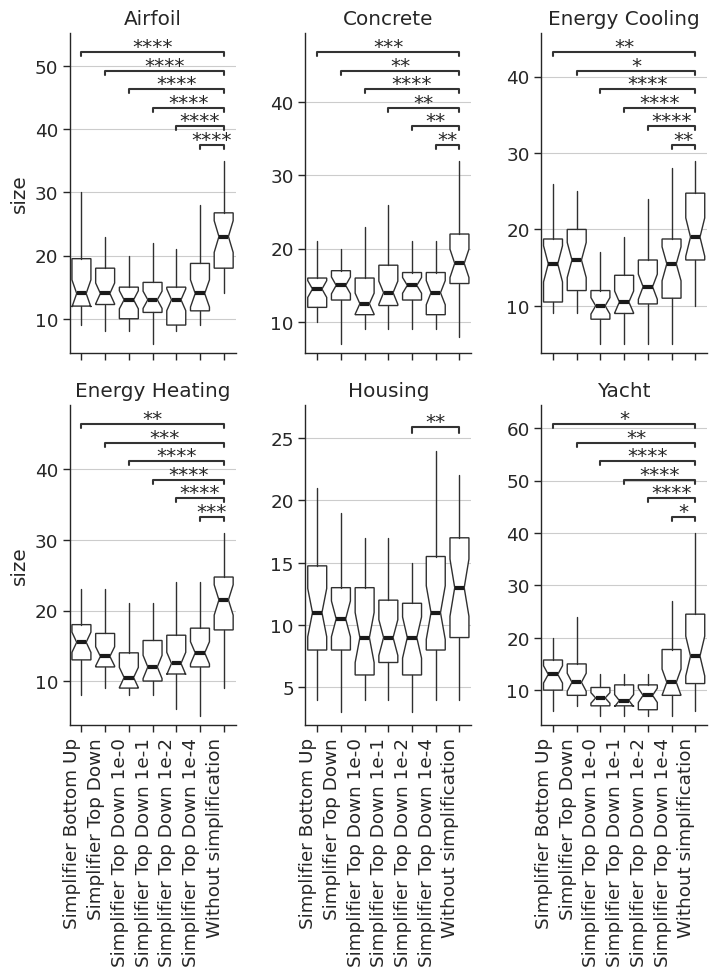

Airfoil


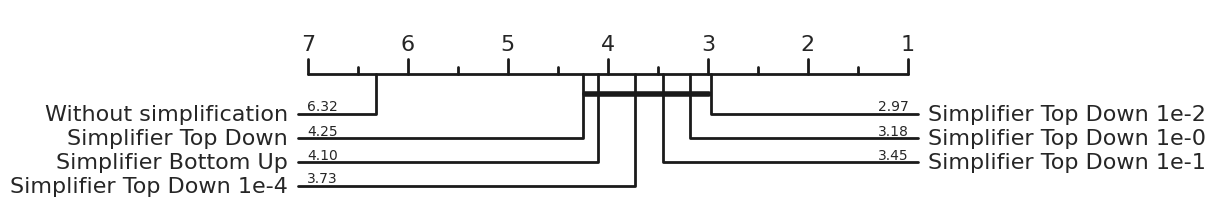

Concrete


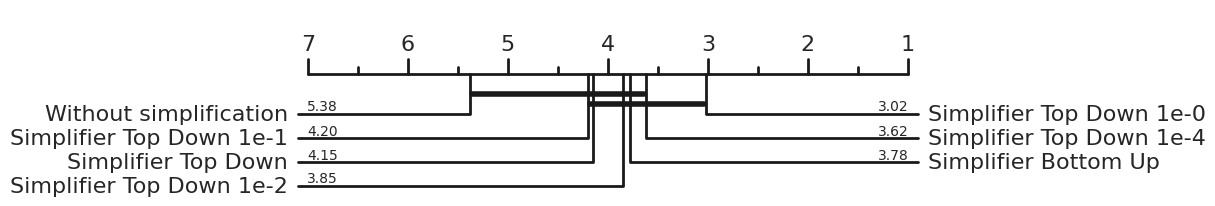

Energy Cooling


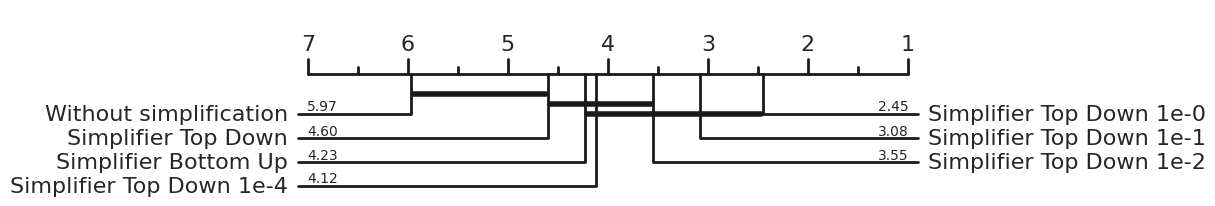

Energy Heating


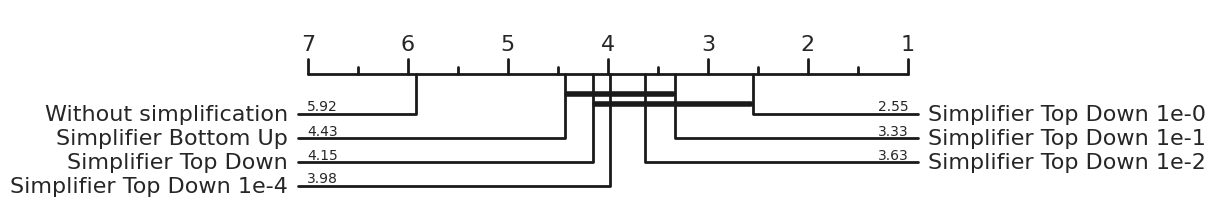

Housing
the null hypothesis over the entire classifiers cannot be rejected
Yacht


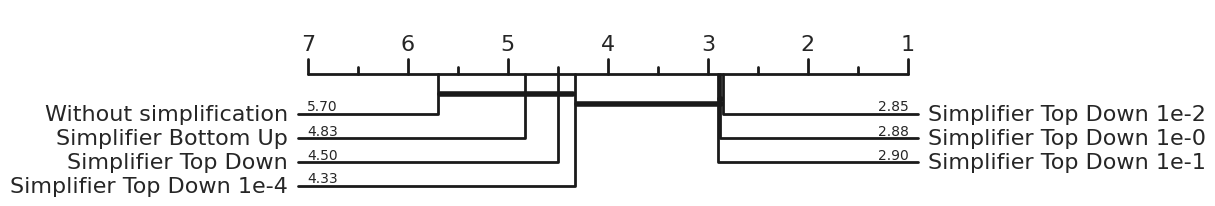

final critical differences diagram


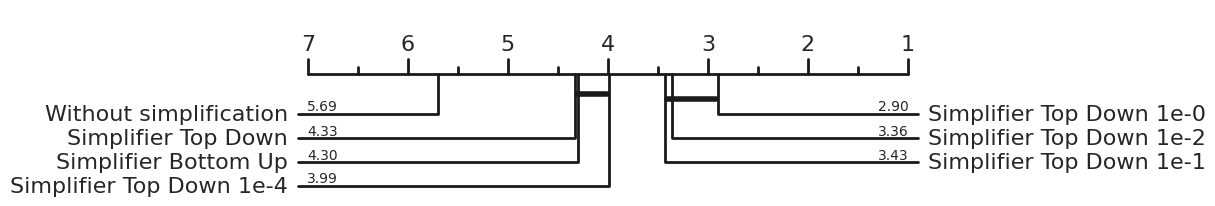

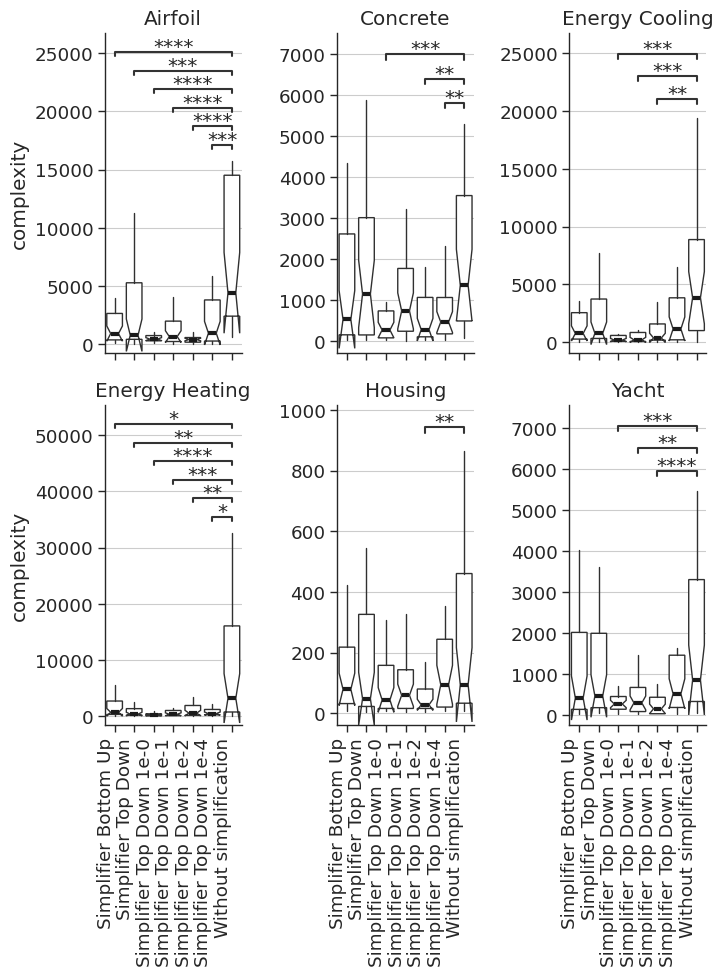

Airfoil


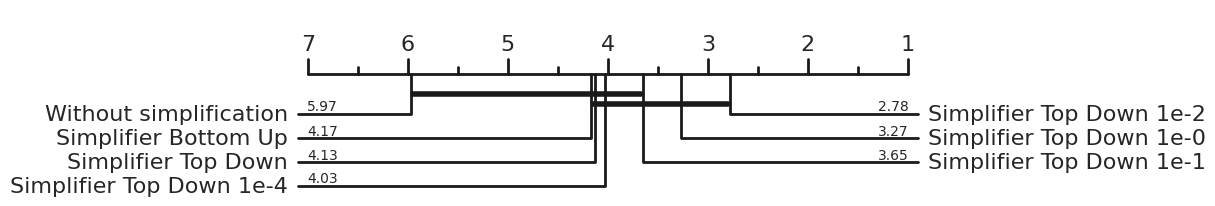

Concrete


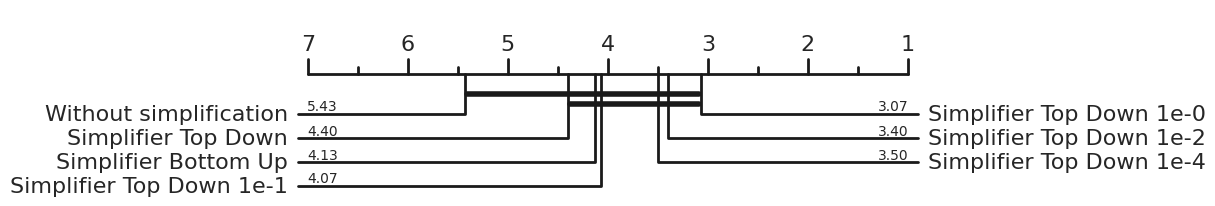

Energy Cooling


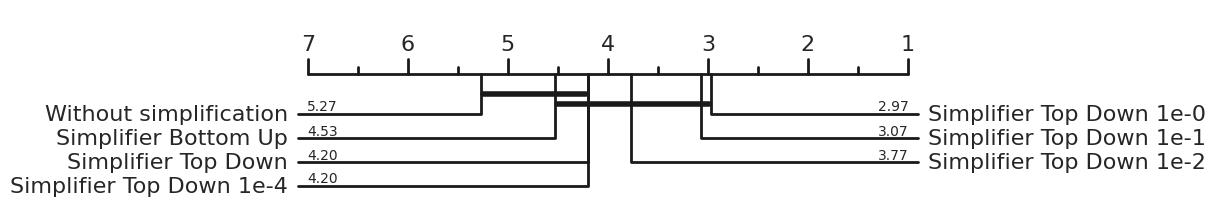

Energy Heating


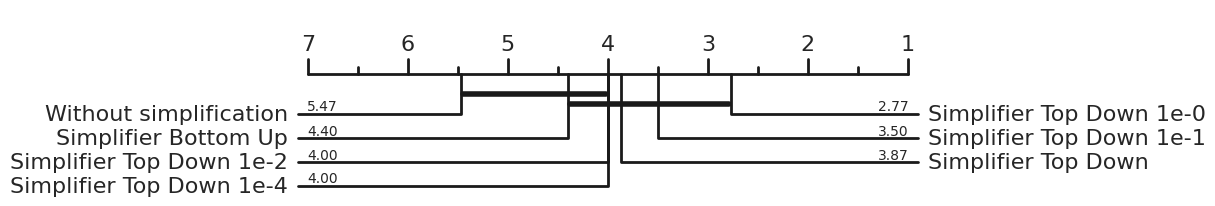

Housing
the null hypothesis over the entire classifiers cannot be rejected
Yacht


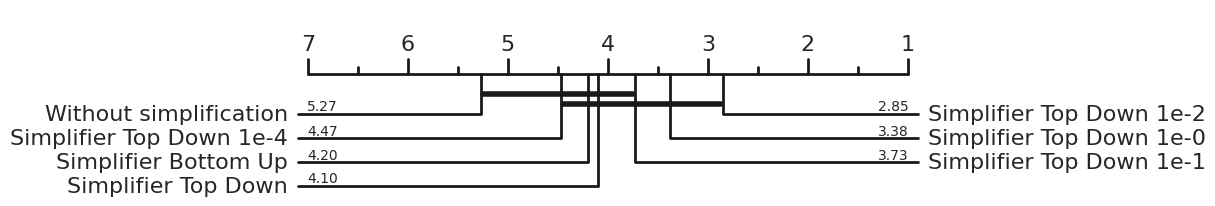

final critical differences diagram


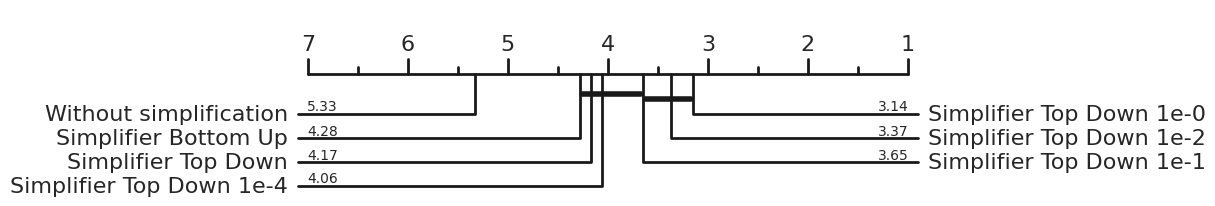

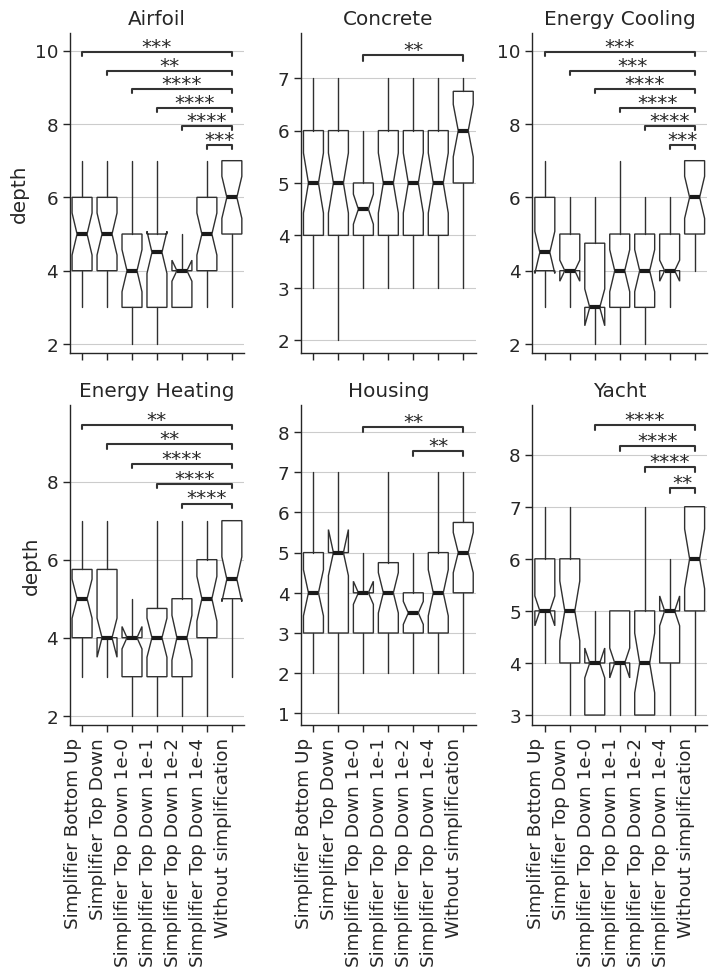

Airfoil


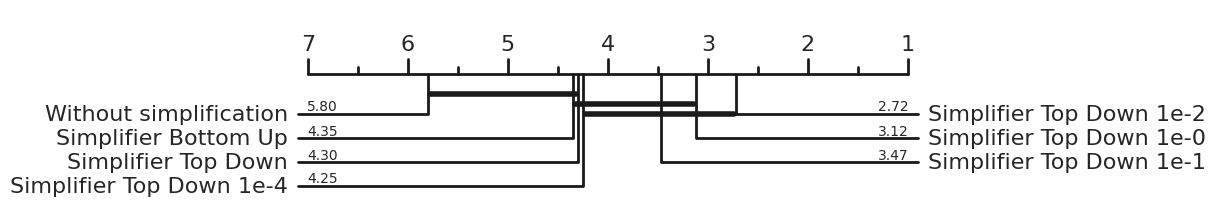

Concrete
the null hypothesis over the entire classifiers cannot be rejected
Energy Cooling


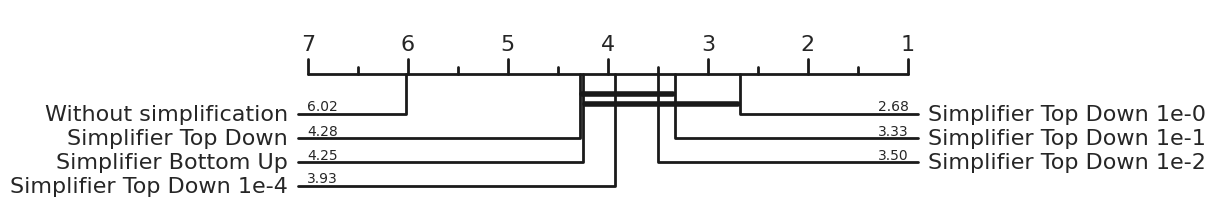

Energy Heating


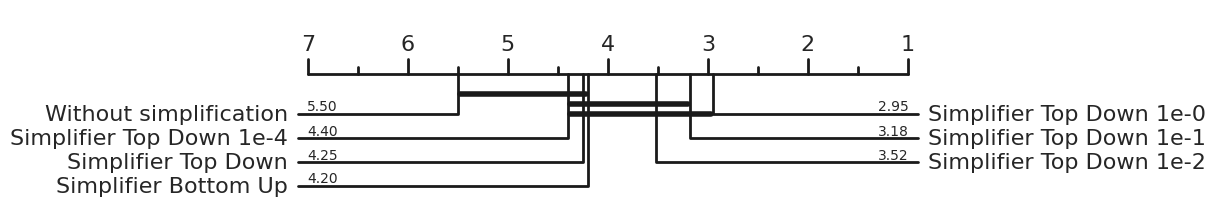

Housing


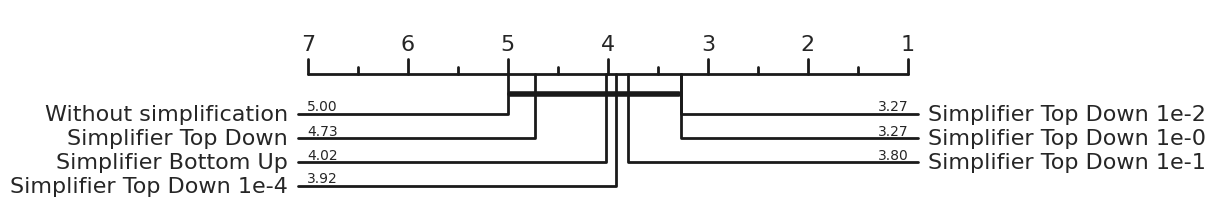

Yacht


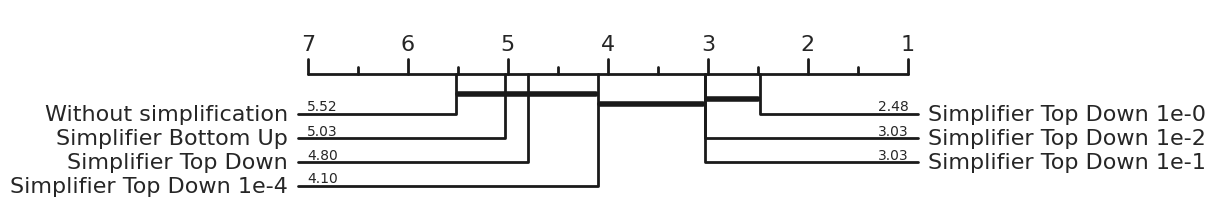

final critical differences diagram


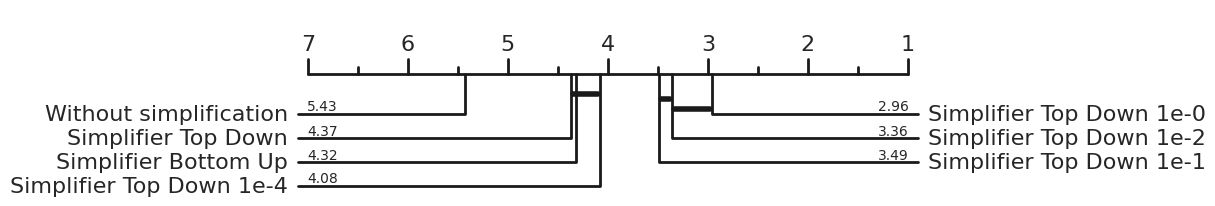

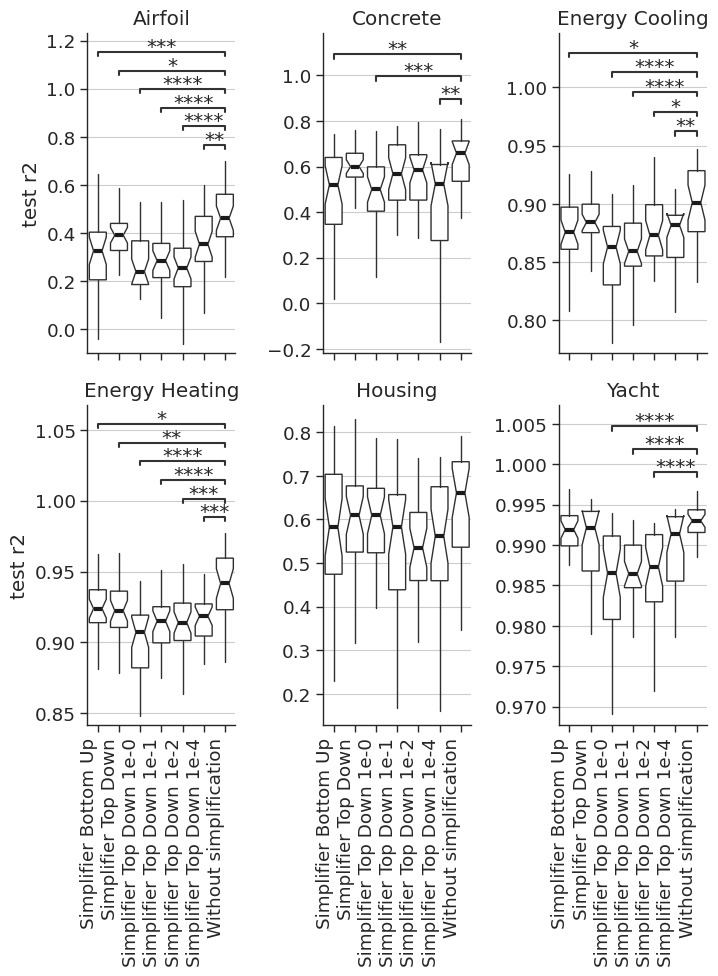

Airfoil


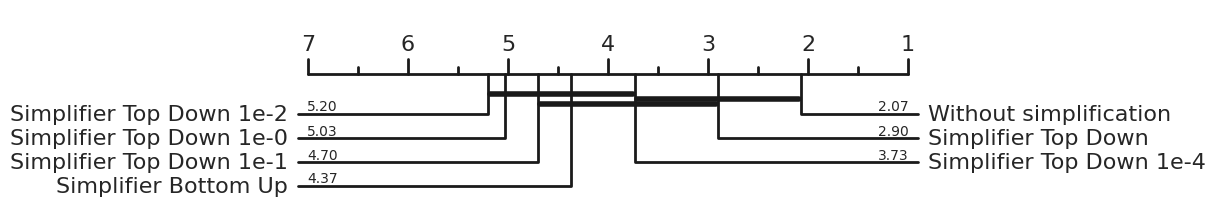

Concrete


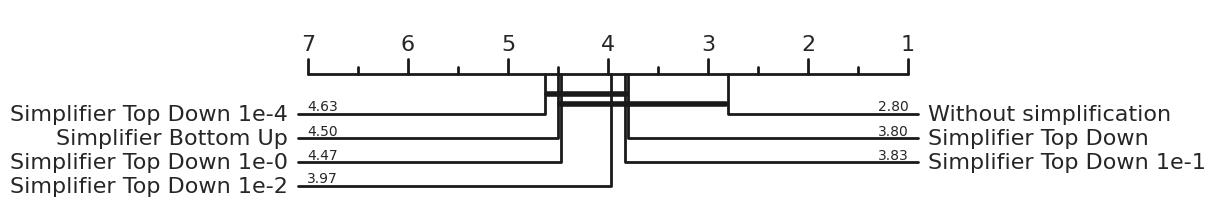

Energy Cooling


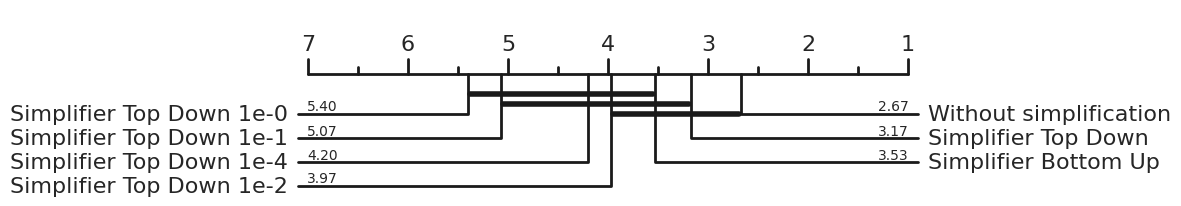

Energy Heating


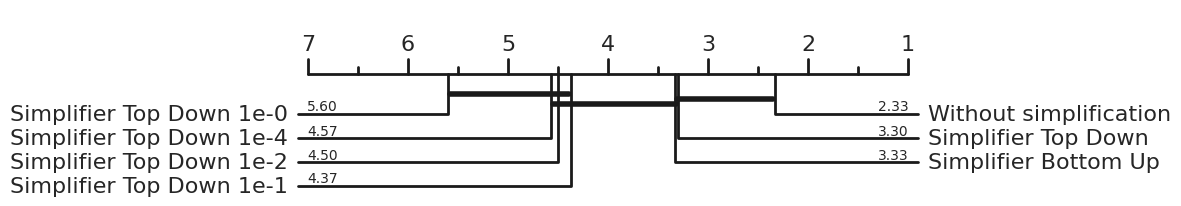

Housing
the null hypothesis over the entire classifiers cannot be rejected
Yacht


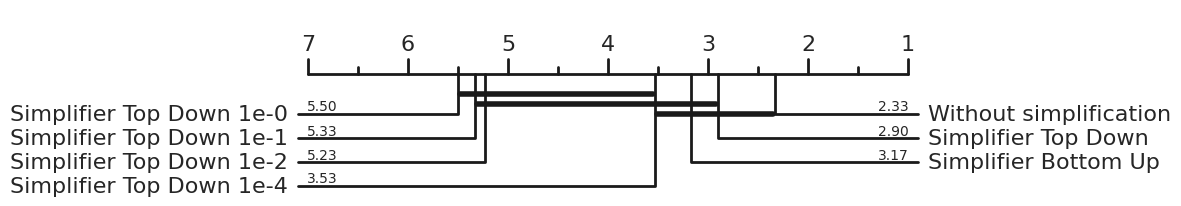

final critical differences diagram


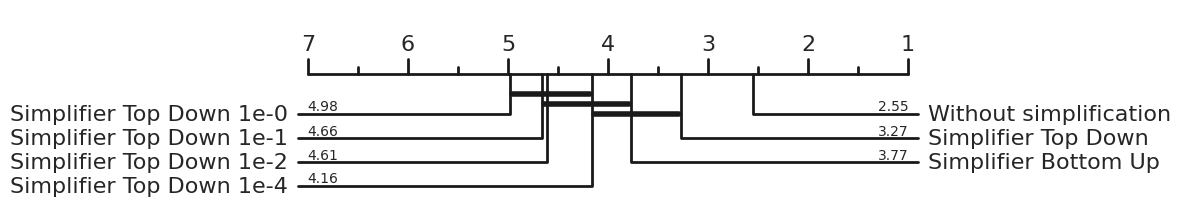

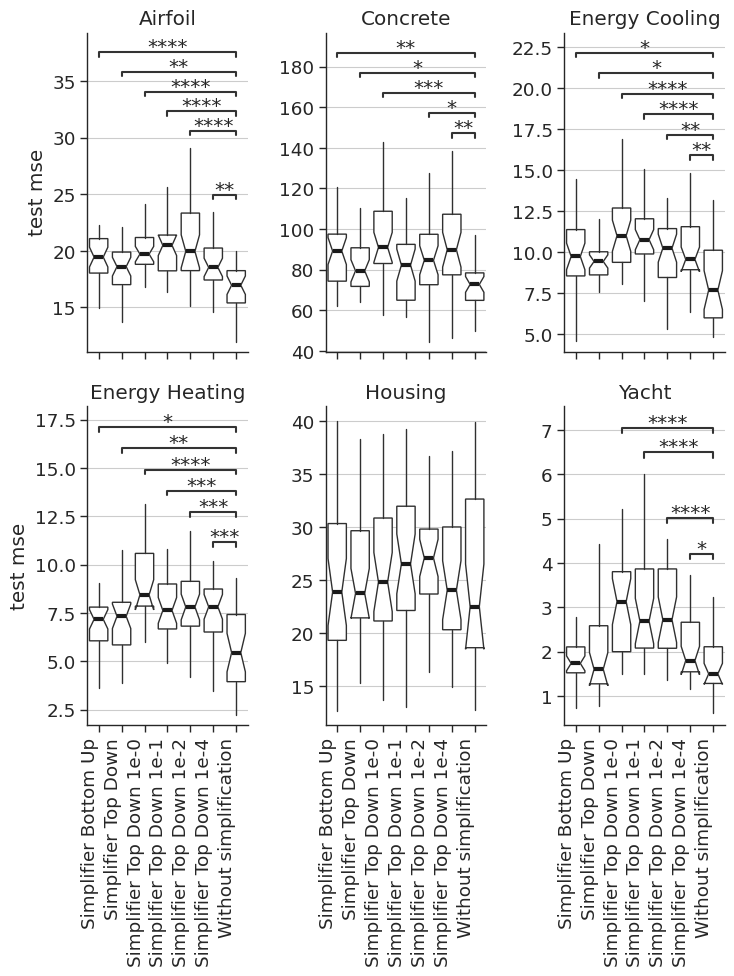

Airfoil


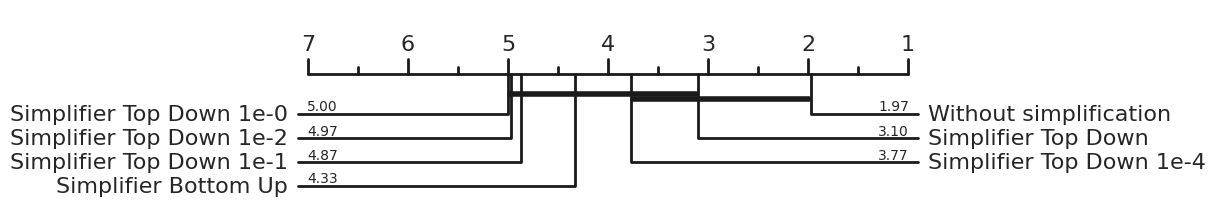

Concrete


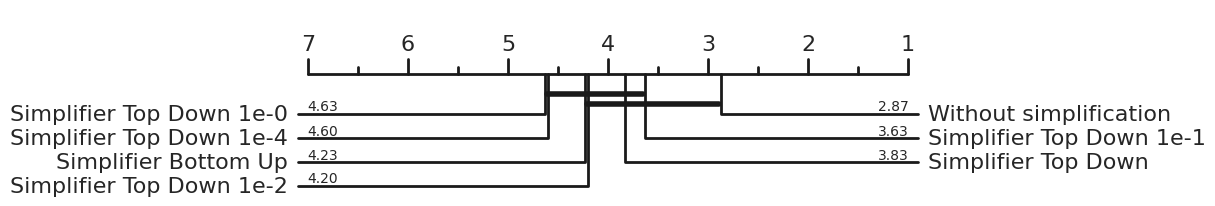

Energy Cooling


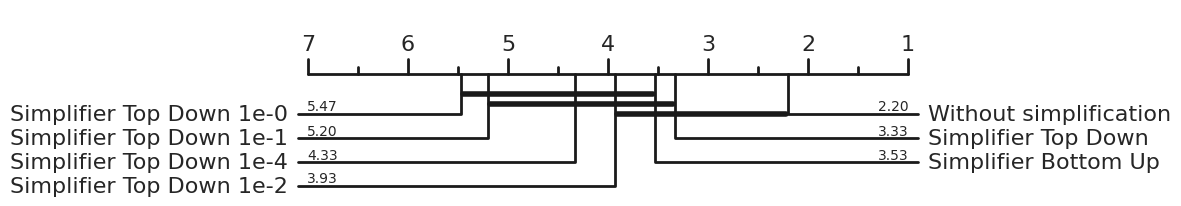

Energy Heating


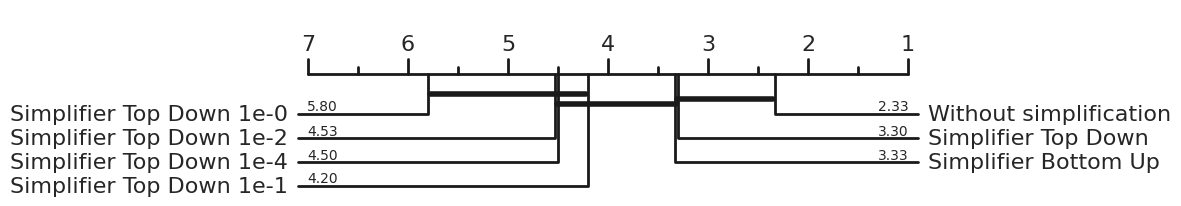

Housing
the null hypothesis over the entire classifiers cannot be rejected
Yacht


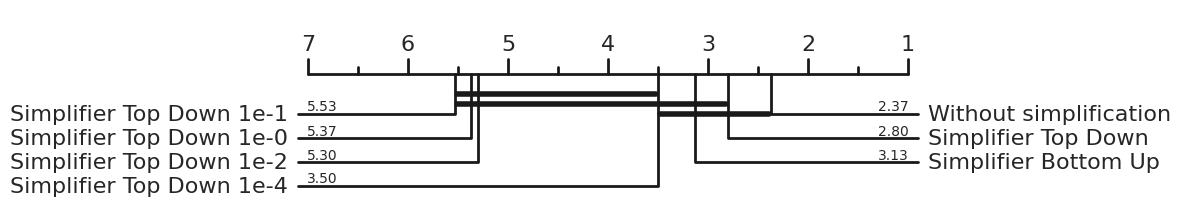

final critical differences diagram


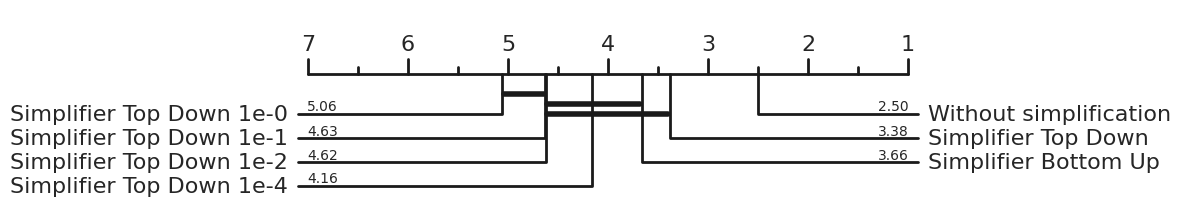

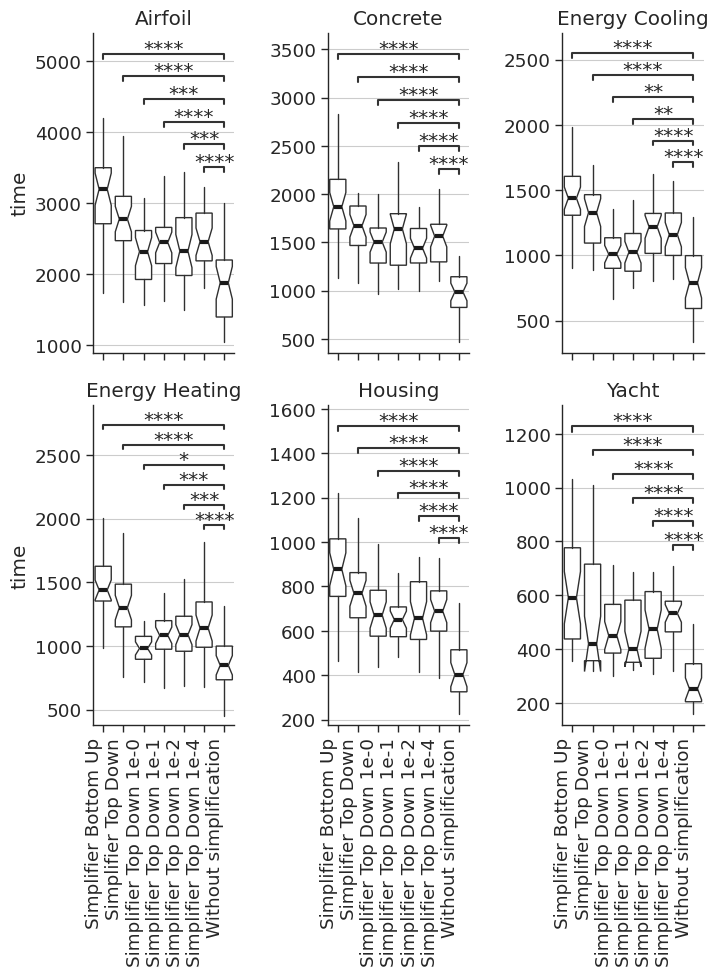

Airfoil


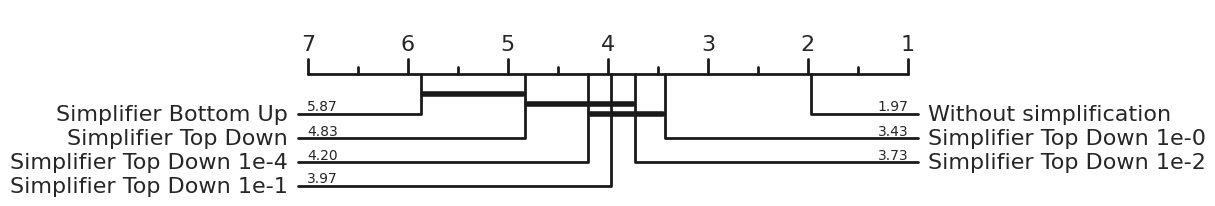

Concrete


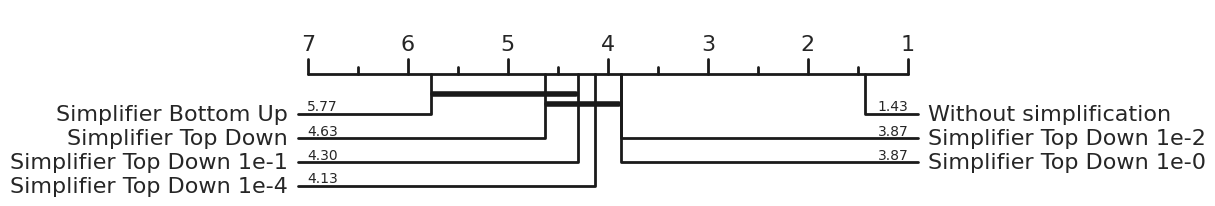

Energy Cooling


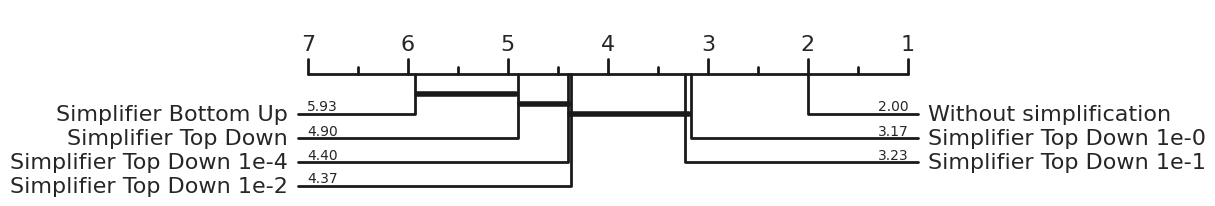

Energy Heating


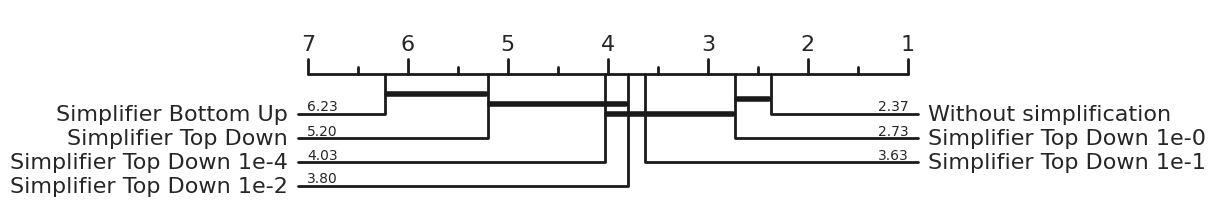

Housing


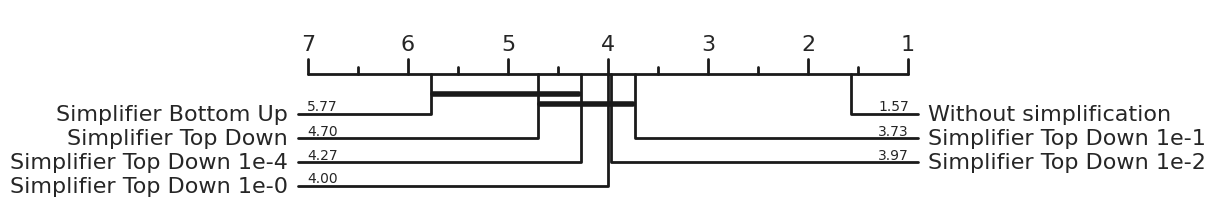

Yacht


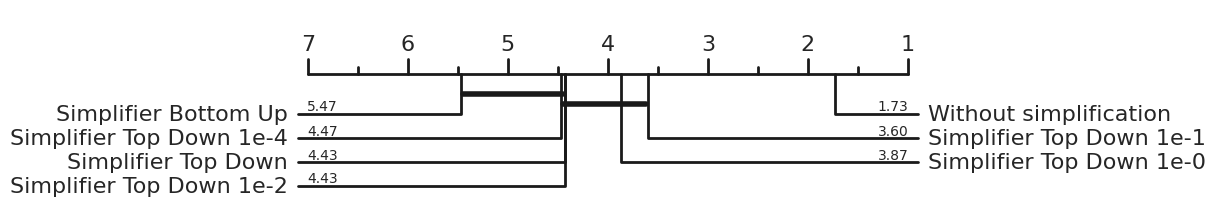

final critical differences diagram


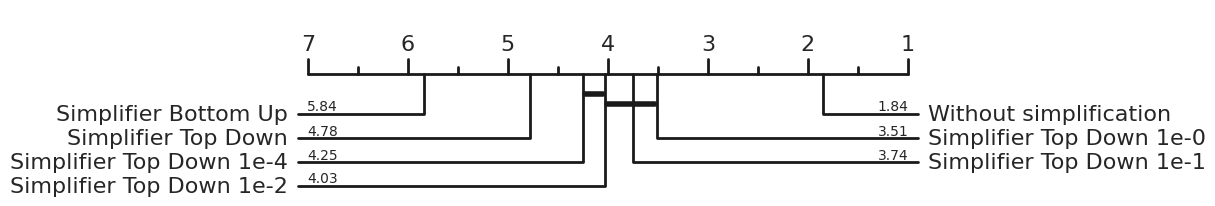

In [6]:
for yaxis in ['size', 'complexity', 'depth', 'test_r2', 'test_mse', 'time']:
    
    # Exploring boxplot results first
    g = sns.catplot(data=results_df, x='model', y=yaxis,
        col='dataset', col_wrap=col_wrap, order=order, 
        **boxplot_kwargs, sharey=False, legend_out=False, aspect=0.5)

    # g.map_dataframe(sns.swarmplot, x="model", y=yaxis, 
    #                 palette=["#000000"], size=3,
    #                 alpha=0.5, dodge=True)

    g.set_titles("{col_name}").set_axis_labels("", yaxis.replace("_", " "))

    for (ds, plot_ax) in g._axes_dict.items():
        plot_ax.grid(which='major', axis='y', linewidth=.8)
        
        for tick in plot_ax.get_xticklabels():
            tick.set(rotation=90, ha="right")

        # All vs baseline
        pairs = [('Without simplification', l)
                    for l in results_df[results_df['dataset']==ds]['model'].unique()
                    if l != 'Without simplification']

        # Contextual vs non-NSGA2
        # pairs = [
        #     ('Baseline', 'C-D-TS')
        # ]

        if True:
            annotator = Annotator(
                plot_ax, pairs, data=results_df[(results_df['dataset']==ds)],
                x='model', y=yaxis,
                order=order)
            annotator.reset_configuration()
            annotator.configure(test="Mann-Whitney", hide_non_significant=True, #text_format='full',
                                comparisons_correction="holm", verbose=0, text_offset=-3)
            
            # Calculate and annotate
            annotator.apply_and_annotate()

    #g.set(yscale="log")

    plt.tight_layout()
    plt.savefig(f"../paper/figs/{yaxis}_boxplot.pdf")
    plt.savefig(f"../paper/figs/{yaxis}_boxplot.png")
    plt.show()  
    
    cd_df = results_df.copy()#.dropna() # (Just Island model sometimes gives an NAN)
    
    # Line below controls if we take the median or use each random seed as a different problem in CD
    # cd_df = cd_df.groupby(['model', 'dataset']).median().reset_index()
    
    cd_df = cd_df[cd_df.model.isin(model_nice)]
    cd_df['dataset_random_state'] = cd_df['dataset'] + '_' + cd_df['random_state'].astype(str)

    cd_df = cd_df[['model', 'dataset_random_state', yaxis]]
    display(cd_df.pivot('dataset_random_state', 'model').sample(3).style.background_gradient(cmap='viridis_r', axis=1))
    
    cd_df.columns = ['classifier_name', 'dataset_name', 'accuracy']
    # display(cd_df.sample())

    if yaxis != 'test_r2': # if smaller is better
        cd_df.accuracy = cd_df.accuracy*-1 

    for ds in results_df['dataset'].unique():
        print(ds)
        draw_cd_diagram(cd_df[cd_df['dataset_name'].str.startswith(ds)],
                        alpha=0.05, path=f"../paper/figs/{yaxis}_criticaldifferences_{ds}.pdf")

    print("final critical differences diagram")
    draw_cd_diagram(cd_df, alpha=0.05, path=f"../paper/figs/{yaxis}_criticaldifferences.pdf")